# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
import torch

#  тензоры a и b
a = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

b = torch.rand(12)

# тензор c размера (2, 2, 3) из тензора b
c = b.view(2, 2, 3)

# первый столбец матрицы a
print(a[:, 0])

tensor([1, 5, 9])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
# вещественный тензор a
a = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0],
                  [5.0, 6.0],
                  [7.0, 8.0],
                  [9.0, 10.0]])

# вещественный тензор b
b = torch.rand(1, 10)

# тензор c размера (5, 2) из тензора b
c = b.view(5, 2)

# арифметические операции с тензорами a и c
print("a + c =", a + c)
print("a - c =", a - c)
print("a * c =", a * c)
print("a / c =", a / c)

a + c = tensor([[ 1.8714,  2.0011],
        [ 3.4497,  4.1587],
        [ 5.2493,  6.0274],
        [ 7.9548,  8.0817],
        [ 9.4100, 10.7232]])
a - c = tensor([[0.1286, 1.9989],
        [2.5503, 3.8413],
        [4.7507, 5.9726],
        [6.0452, 7.9183],
        [8.5900, 9.2768]])
a * c = tensor([[8.7137e-01, 2.2163e-03],
        [1.3492e+00, 6.3465e-01],
        [1.2467e+00, 1.6442e-01],
        [6.6839e+00, 6.5341e-01],
        [3.6900e+00, 7.2319e+00]])
a / c = tensor([[1.1476e+00, 1.8048e+03],
        [6.6705e+00, 2.5211e+01],
        [2.0053e+01, 2.1895e+02],
        [7.3311e+00, 9.7947e+01],
        [2.1951e+01, 1.3828e+01]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

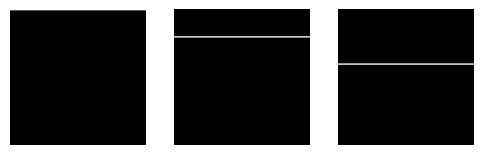

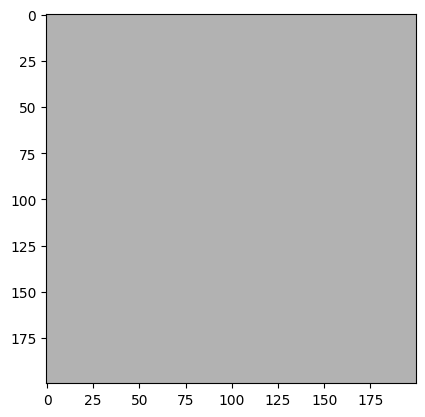

In [ ]:
images = torch.zeros(100, 200, 200, 3, dtype=torch.uint8)

# белая полоса
for i in range(100): images[i, i*2:i*2+2, :, :] = 255

# вывод нескольких картинок
plt.figure(figsize=(6, 6))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i*20])
    plt.axis('off')
plt.show()

mean_image = torch.mean(images.float(), dim=0)  # к float перед вычислением mean

mean_image *= 70

plt.imshow(mean_image.int())
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
import torch
from torch.autograd import Variable

a = torch.empty(2, 3, 4).uniform_().cuda()
b = torch.empty(1, 8, 3).uniform_().cuda()
c = b.view(2, 3, 4)

a = Variable(a.cpu(), requires_grad=True)
c = Variable(c.cpu(), requires_grad=True)

L = torch.mean((c - a) ** 2)
L.backward()
print(c.grad)

tensor([[[-0.0790,  0.0010,  0.0212,  0.0267],
         [-0.0009, -0.0551,  0.0065,  0.0353],
         [-0.0370,  0.0136,  0.0146, -0.0008]],

        [[-0.0047, -0.0092, -0.0225, -0.0572],
         [-0.0460, -0.0384, -0.0190, -0.0221],
         [-0.0445, -0.0389,  0.0237, -0.0228]]])
